In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, time, date
import datetime as dt
import warnings
import sklearn
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score

import yfinance as yf
import numpy as np
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import urllib.request, json
from pandas import json_normalize
import math
import scipy.stats as sp

# The first thing we want to do is import the Pandas library and set the filepath to our data file
import pandas as pd
import pandas_ta as ta
import warnings
from pandas.tseries.offsets import DateOffset
import warnings
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import groupby, chain
from collections import OrderedDict

import quandl
quandl.ApiConfig.api_key = 'soxd-469x3Zp4ib_4uzc'
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [2]:

df_MKPRU = quandl.get("BCHAIN/MKPRU", authtoken="soxd-469x3Zp4ib_4uzc") # price
df_MWNUS = quandl.get("BCHAIN/MWNUS", authtoken="soxd-469x3Zp4ib_4uzc")
df_HRATE = quandl.get("BCHAIN/HRATE", authtoken="soxd-469x3Zp4ib_4uzc")
df_DIFF = quandl.get("BCHAIN/DIFF", authtoken="soxd-469x3Zp4ib_4uzc")
df_MIREV = quandl.get("BCHAIN/MIREV", authtoken="soxd-469x3Zp4ib_4uzc")
df_CPTRA = quandl.get("BCHAIN/CPTRA", authtoken="soxd-469x3Zp4ib_4uzc")
df_TRVOU = quandl.get("BCHAIN/TRVOU", authtoken="soxd-469x3Zp4ib_4uzc")
#df_CPTRV = quandl.get("BCHAIN/CPTRV", authtoken="soxd-469x3Zp4ib_4uzc")
df_ETRVU = quandl.get("BCHAIN/ETRVU", authtoken="soxd-469x3Zp4ib_4uzc")
df_ETRAV = quandl.get("BCHAIN/ETRAV", authtoken="soxd-469x3Zp4ib_4uzc")
df_TOUTV = quandl.get("BCHAIN/TOUTV", authtoken="soxd-469x3Zp4ib_4uzc")
df_NTRBL = quandl.get("BCHAIN/NTRBL", authtoken="soxd-469x3Zp4ib_4uzc")
df_NTRAT = quandl.get("BCHAIN/NTRAT", authtoken="soxd-469x3Zp4ib_4uzc")
df_NADDU = quandl.get("BCHAIN/NADDU", authtoken="soxd-469x3Zp4ib_4uzc")
df_NTREP = quandl.get("BCHAIN/NTREP", authtoken="soxd-469x3Zp4ib_4uzc")
df_NTRAN = quandl.get("BCHAIN/NTRAN", authtoken="soxd-469x3Zp4ib_4uzc")
df_TRFUS = quandl.get("BCHAIN/TRFUS", authtoken="soxd-469x3Zp4ib_4uzc")
df_TRFEE = quandl.get("BCHAIN/TRFEE", authtoken="soxd-469x3Zp4ib_4uzc")
df_MKTCP = quandl.get("BCHAIN/MKTCP", authtoken="soxd-469x3Zp4ib_4uzc")
df_TOTBC = quandl.get("BCHAIN/TOTBC", authtoken="soxd-469x3Zp4ib_4uzc")

#df_MWNTD = quandl.get("BCHAIN/MWNTD", authtoken="soxd-469x3Zp4ib_4uzc")   # HASTA AYER
#df_MWTRV = quandl.get("BCHAIN/MWTRV", authtoken="soxd-469x3Zp4ib_4uzc")   # HASTA AYER

df_AVBLS = quandl.get("BCHAIN/AVBLS", authtoken="soxd-469x3Zp4ib_4uzc")
df_BLCHS = quandl.get("BCHAIN/BLCHS", authtoken="soxd-469x3Zp4ib_4uzc")
df_ATRCT = quandl.get("BCHAIN/ATRCT", authtoken="soxd-469x3Zp4ib_4uzc")

In [3]:
df_HRATE2 = quandl.get("BCHAIN/HRATE", authtoken="soxd-469x3Zp4ib_4uzc")

In [16]:
class target:
    
    def __init__(self,df,column_date='date'):
        self.df = df
        self.column_date = column_date
       
    def max_min(self, initial_days=0, days=10, column_target='high', method=max):
        df = self.df
        column_date = self.column_date

        df_target = df[[column_date,column_target]].copy()
        df_target_original = df_target.copy()
        list_of_targets=[column_date]
        #in loop add one column per day
        for i in range(initial_days,days+1):
            df_target_temp = df_target_original.copy()
            df_target_temp[column_date+str(i)] = df_target_temp[column_date] + pd.Timedelta(days=-i)
            df_target_temp = df_target_temp[[column_date+str(i),column_target]].rename(columns={column_target:column_target+str(i)})
            df_target=pd.merge(df_target,df_target_temp, how='left',left_on=column_date, right_on=column_date+str(i))
            df_target = df_target.dropna()
            list_of_targets.append(column_target+str(i))
       
        df_target = df_target[list_of_targets]
        if method==max:
            df_target['target'] = df_target[list_of_targets].max(axis=1)
        if method==min:
            df_target['target'] = df_target[list_of_targets].min(axis=1)
        df_target=df_target[[column_date, 'target']]
        df_target = df_target.sort_values([column_date], ascending=[True]).reset_index(drop=True).sort_values([column_date], ascending=[False])
       
        return(df_target)  
   
    def close(self, days=10,column_target='close'):
        df = self.df
        column_date = self.column_date    
        df_target = df[[column_date,column_target]].copy()
        df_target[column_date+ "_-_" +str(days)] = df_target[column_date] + pd.Timedelta(days=-days)
        df_target = df_target.drop(columns=column_date, axis=1)
        dictionary={column_date+ "_-_" +str(days):column_date, column_target:'target'}
        df_target = df_target.rename(columns=dictionary)
        df_target = df_target[[column_date, 'target']]
        return (df_target)
   
    def direction(self,days=10,column_target='close', column_high='high', column_low='low'):
        df = self.df
        column_date = self.column_date
        df_close = df[[column_date, 'close']].copy()
        df_target_max = target(df).max_min(method=max).rename(columns={'target':'max'})
        df_target_min = target(df).max_min(method=min, column_target='low').rename(columns={'target':'min'})
        df_target_close = target(df).close().rename(columns={'target':'target_close'})
        df_final = pd.merge(df_close, df_target_max, on=column_date, how='inner')
        df_final = pd.merge(df_final, df_target_min, on=column_date, how='inner')
        df_final = pd.merge(df_final, df_target_close, on=column_date, how='inner')
        df_final['direction'] =df_final['close'] + (df_final['max'] - df_final['close']  + df_final['min'] - df_final['close'] + df_final['target_close'] - df_final['close'])/3
        df_final = df_final[['date','direction']]
        return(df_final)


def plot_table(df):
    # Create a new figure and axis
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    # Create the table
    the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

    # Modify the appearance of the table
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)
    the_table.auto_set_column_width(list(range(df.shape[1])))
    the_table.scale(1, 1.5)
    plt.show()
    #plt.savefig('table.jpg', format='jpg')
    return
    
def get_data_yfinance(asset, interval='1d', start='2011-01-01'):
    date_column = 'Date'
    list_of_days = ['1d', '5d', '1wk', '1mo', '3mo']
    list_of_minutes = ['1m', '2m', '5m', '15m', '30m', '60m', '90m']
    df = yf.download(asset, start=start, threads= False, interval=interval)
    df = df.reset_index()
    if interval== '1h':
        df = df.rename(columns={'index':'Date'})
    elif interval in list_of_minutes:
        df = df.rename(columns={'Datetime':'Date'})
        #df[date_column] = df[date_column].str[:]
       
    # Now that we have loaded our data into the dataframe, we can preview it using the print & .head() function
   
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.sort_values([date_column], ascending=[True]).reset_index(drop=True).sort_values([date_column], ascending=[False])
    df = df.rename(columns={'Date':'date','Open':'open', 'High':'high', 'Low': 'low','Close':'close', 'Volume':'tradecount'})
    return(df)

def add_derivates(df, feature, periods=1):
    df_new = df.copy()
    diff_1 = df[[feature]].diff(periods=periods).rename(columns={feature: feature +"_diff1"})
    df_new = pd.concat([df_new, diff_1], axis=1).dropna()
    del df
    return df_new

def get_ribbons(df, sma_low, sma_high, list_of_features, date_column='date'):
    df_out=df.copy()
    list_of_columns = [date_column] + list_of_features
    df_out=df_out[list_of_columns]
    list_of_sma = []
    list_of_ribbon = []
    for i in list_of_features:
        sma_low_ = i + '_sma_' + str(sma_low)
        list_of_sma.append(sma_low_)
        df_out[sma_low_] = pd.Series.to_frame(ta.sma(df_out[i], length=sma_low))
        sma_high_ = i + '_sma_' + str(sma_high)
        list_of_sma.append(sma_high_)
        df_out[sma_high_] = pd.Series.to_frame(ta.sma(df_out[i], length=sma_high))
        ribbon_ = 'ribbon_' + i + '_' +  str(sma_low) + '_' + str(sma_high)
        list_of_ribbon.append(ribbon_)
        df_out[ribbon_] = (df_out[sma_low_] - df_out[sma_high_])
    df_out = df_out.dropna()
    return df_out

def get_ribbons_30_60(df, list_of_names_df):
    df_final=df.copy()
    list_of_sma = []
    list_of_ribbon = []
    for i in list_of_names_df:
        sma_30 = i + '_sma_30'
        list_of_sma.append(sma_30)
        df_final[sma_30] = pd.Series.to_frame(ta.sma(df_final[i], length=30))
        sma_60 = i + '_sma_60'
        list_of_sma.append(sma_60)
        df_final[sma_60] = pd.Series.to_frame(ta.sma(df_final[i], length=60))
        ribbon_30_60 = 'ribbon_' + i + '_30_60'
        list_of_ribbon.append(ribbon_30_60)
        df_final[ribbon_30_60] = (df_final[sma_30] - df_final[sma_60])
    return df_final


def mase(valores_verdaderos, predicciones, periodo=1):
    # Calcula el Error Absoluto Medio (MAE)
    mae = np.mean(np.abs(valores_verdaderos - predicciones))
    # Calcula la serie temporal de errores absolutos
    errores_absolutos = np.abs(valores_verdaderos - predicciones)
    # Calcula el MASE
    mase = mae / np.mean(errores_absolutos[:periodo])
    return mase

def mae(valores_verdaderos, predicciones):
    return np.mean(np.abs(valores_verdaderos - predicciones))


def create_linear_regression_of_maximums(df_in, feature_column, date_column='date'):
            
    df_out = df_in[[date_column, feature_column]]
    if date_column != 'date':
        df_out = df_out.rename(columns={date_column:'date'})
    date_column='date'
    first_date_str = df_out.iloc[0].date
    first_date = first_date_str.to_pydatetime().date()
    df_out[df_out[date_column]==first_date_str].iloc[0][1]#.CPTRA_sma_30
    maximum_date_CPTRA = {}
    today = date.today()
    number_of_years = today.year - first_date.year
    low_date = first_date
    maximum_value=0
    list_of_dates=[]
    list_of_values=[]

    for i in range(number_of_years+1):
        low_date =  first_date_str + dt.timedelta(days = 365*i)
        high_date =  first_date_str + dt.timedelta(days = 365*(i+1))
        df_filtered = df_out[(df_out[date_column] > low_date) &  (df_out[date_column] <= high_date)]
        maximum = df_filtered[[feature_column]].max()[0]#.CPTRA_sma_30
        if maximum > maximum_value:
            maximum_value = maximum
            list_of_dates.append(df_filtered[df_filtered[feature_column]==df_filtered[feature_column].max()].reset_index().iloc[0].date)
            list_of_values.append(maximum)

    dataframe_dates_maximum = pd.DataFrame(
        {date_column: list_of_dates,
        feature_column: list_of_values
        })

    total_days = (today - first_date).days
    # https://laid-back-scientist.com/en/fill-datetime
    df_ = dataframe_dates_maximum.set_index(date_column)
    df_ = df_.asfreq(freq='1440min')
    df_fill = df_.reset_index()

    # https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/
    df_dates = df_out[[date_column]].copy()
    df_new = pd.merge(df_dates, dataframe_dates_maximum, how='left', on=date_column)
    df_fill = df_new.copy()
    df_fill =df_fill.set_index(date_column)
    y=np.array(df_fill[feature_column].dropna().values, dtype=float)
    x=np.array(pd.to_datetime(df_fill[feature_column].dropna()).index.values, dtype=float)
    x_tot = np.array(pd.to_datetime(df_fill[feature_column]).index.values, dtype=float)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
    xf = np.linspace(min(x_tot),max(x_tot),len(df_fill))
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
    x_for_df = xf1.to_list()
    y_for_df = np.array(yf).tolist()
    name_of_feature = 'linear_regression_max_' + feature_column
    df_linear_regression_max = pd.DataFrame(
        {date_column: x_for_df,
        name_of_feature: y_for_df
        })
    df_linear_regression_max = df_linear_regression_max[df_linear_regression_max['linear_regression_max_' + feature_column]>0]
    df_linear_regression_max[date_column] = pd.to_datetime(df_linear_regression_max[date_column]).dt.date
    df_linear_regression_max[date_column] = pd.to_datetime(df_linear_regression_max[date_column])
    #df_linear_regression_max[name_of_feature] = df_linear_regression_max[name_of_feature].clip(lower=0)

    return df_linear_regression_max

def create_linear_regression_of_minimums(df_in, feature_column, date_column='date'):

    df_out = df_in[[date_column,feature_column]].copy()
    first_date_str = df_out.iloc[0].date
    first_date = first_date_str.to_pydatetime().date()
    df_out[df_out[date_column]==first_date_str].iloc[0].CPTRA_sma_30
    maximum_date_CPTRA = {}
    today = date.today()
    number_of_years = today.year - first_date.year
    low_date = first_date
    maximum_value=0
    list_of_dates=[]
    list_of_values=[]

    for i in range(number_of_years+1):
        low_date =  first_date_str + dt.timedelta(days = 365*i)
        high_date =  first_date_str + dt.timedelta(days = 365*(i+1))
        df_filtered = df_out[(df_out[date_column] > low_date) &  (df_out[date_column] <= high_date)]
        minimum = df_filtered[[feature_column]].min().CPTRA_sma_30
        try:
            list_of_dates.append(df_filtered[df_filtered[feature_column]==df_filtered[feature_column].min()].reset_index().iloc[0].date)
            list_of_values.append(minimum)
        except:
            pass

    # Now get minimum absolutes

    list_of_absolutes_dates=[]
    list_of_absolutes_values=[]    
    count=0
    length_data = len(list_of_values)
    maximum_of_minimum = list_of_values[length_data-1]
    list_of_absolutes_values.append(list_of_values[length_data-1])
    list_of_absolutes_dates.append(list_of_dates[length_data-1])
    for i in reversed(list_of_values):
        count+=1
        if i < maximum_of_minimum:
            maximum_of_minimum = i
            list_of_absolutes_values.append(i)
            list_of_absolutes_dates.append(list_of_dates[length_data-count])
        
    dataframe_dates_minimum = pd.DataFrame(
        {date_column: list_of_absolutes_dates,
        feature_column: list_of_absolutes_values
        })
    dataframe_dates_minimum = dataframe_dates_minimum[:-1] # delete last data
    total_days = (today - first_date).days           
    df_ = dataframe_dates_minimum.set_index(date_column)
    df_ = df_.asfreq(freq='1440min')
    df_fill = df_.reset_index()
    df_dates = df_out[[date_column]]
    df_new = pd.merge(df_dates, dataframe_dates_minimum, how='left', on=date_column)
    df_fill = df_new.copy()
    df_fill =df_fill.set_index(date_column)

    # https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/
    df_dates = df_out[[date_column]].copy()
    df_new = pd.merge(df_dates, dataframe_dates_minimum, how='left', on=date_column)
    df_fill = df_new.copy()
    df_fill =df_fill.set_index(date_column)
    y=np.array(df_fill[feature_column].dropna().values, dtype=float)
    x=np.array(pd.to_datetime(df_fill[feature_column].dropna()).index.values, dtype=float)
    x_tot = np.array(pd.to_datetime(df_fill[feature_column]).index.values, dtype=float)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
    xf = np.linspace(min(x_tot),max(x_tot),len(df_fill))
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
    x_for_df = xf1.to_list()
    y_for_df = np.array(yf).tolist()
    name_of_feature = 'linear_regression_min_' + feature_column
    df_linear_regression_min = pd.DataFrame(
        {date_column: x_for_df,
        name_of_feature : y_for_df
        })
    df_linear_regression_min = df_linear_regression_min[df_linear_regression_min['linear_regression_min_' + feature_column]>0]
    df_linear_regression_min[date_column] = pd.to_datetime(df_linear_regression_min[date_column]).dt.date
    df_linear_regression_min[date_column] = pd.to_datetime(df_linear_regression_min[date_column])
    df_linear_regression_min[name_of_feature] = df_linear_regression_min[name_of_feature].clip(lower=0)
    return df_linear_regression_min


def rf_model(df_rf, max_features=None, max_depth=4, min_samples_leaf=20, min_samples_split=20, n_estimators=1000, \
             bootstrap=False, split=0.8, column_target='target'):
    #X son todas las columnas que entrenarán el algoritmo salvo la clase a predecir, que no nos interesa que esté
    X=df_rf.drop(columns=[column_target], axis=1)
    #Y será la clase a predecir
    Y=df_rf[column_target]
    split_train = int(len(df_rf)*split)
    test = df_rf[0:-split_train]
    train = df_rf[-split_train:]
    X_train = train.drop(columns=[column_target], axis=1)
    y_train = train[column_target]

    X_test = test.drop(columns=[column_target], axis=1)
    y_test = test[column_target]
    rf = RandomForestRegressor(max_features=max_features,
                             max_depth=max_depth,  
                             min_samples_leaf=min_samples_leaf,
                             min_samples_split=min_samples_split,
                             n_estimators=n_estimators,
                             bootstrap=bootstrap)
    #Entrenamos el modelo con los datos de entrenamiento y las etiquetas o clases de entrenamiento
    rf.fit(X_train,y_train)
    #Usamos el modelo entrenado para predecir los datos de test. si hacemos el print(y_pred_rf, y_test), podemos ver el valor predicho frente al real.
    y_pred_rf=rf.predict(X_test)
    feature_columns=list(X_train.columns)
    features=df_rf[feature_columns]
    importances = list(rf.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_columns, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    # Print out the feature and importances
    for pair in feature_importances:
        print('Variable: {:20} Importance: {}'.format(*pair))
    mse = mean_squared_error(y_pred_rf, y_test.values)
    print(math.sqrt(mse))
    y_train_pred_rf=rf.predict(X_train)
    mse_train = mean_squared_error(y_train_pred_rf, y_train.values)
    print(math.sqrt(mse_train))
                       
    # mase
    maseTrainScore = mase(y_train.values, y_train_pred_rf)
    maseTestScore = mase(y_test.values, y_pred_rf)
    
    return(maseTestScore, maseTrainScore, mse, mse_train, feature_importances)



def create_model(X_train, input_layers = 4, units=200, drop=0.1):
    model = Sequential()
    for i in range(input_layers-1):
        model.add(LSTM(units = units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(drop))
    model.add(Dropout(drop))
    model.add(LSTM(units = units))
    model.add(Dense(1)) #y_train.shape[-1])
    return(model)

def create_dataset(dataset, dataset_y, look_back, look_forward):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-look_forward):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset_y[(i + look_back+ look_forward-1):(i + look_back + look_forward), 0]) #ojo look_forward primero
    return np.array(dataX), np.array(dataY)

def create_dataset_official(dataset, dataset_y, look_back):
    dataX, dataY = [], []
    for i in range(look_back,len(dataset)):
        a = dataset[i-look_back:i]
        dataX.append(a)
        dataY.append(dataset_y[i])
    return np.array(dataX), np.array(dataY)

def split_data(X, y, test_size):
        pos = int(round(len(X) * (1-test_size)))
        X_train, y_train = X[:pos], y[:pos]
        X_test, y_test = X[pos:], y[pos:]
        return X_train, y_train, X_test, y_test

def test_lstm(df,list_of_smas, capas=4, epochs=40, look_back=10, look_forward=0, batch_size=20, split=0.2, drop=0.1, optimizador='sgd', initial_days=1, days_target=10, column_target = 'target', units=50, column_date='date'):
    df_lstm = df.sort_index(ascending=False)
    df_lstm = df_lstm[list_of_smas]
    X=df_lstm.drop(columns=['target'], axis=1)
    #Y será la clase a predecir

    y=df_lstm['target']

    #dataset= X.values
    dataset_y = y.values
    

    df_for_scaled = pd.concat([X,y], axis=1)

    dataset = df_for_scaled.values
    dataset = dataset.reshape(-1,dataset[0].size)
    dataset = dataset.astype("float32")

    dataset_y = dataset_y.reshape(-1,1)
    dataset_y = dataset_y.astype("float32")

    plt.plot(dataset_y)
    plt.xlabel("day")
    plt.ylabel("Price")
    plt.title("Historical Bitcoin Price (Binance Exchange)")
    plt.show()

    # scaling datase
    scaler = MinMaxScaler(feature_range=(0,1))
    dataset = scaler.fit_transform(dataset)
    dataset_y = scaler.fit_transform(dataset_y)
    #X, y = create_dataset(dataset, dataset_y, look_back,look_forward)
    X, y = create_dataset_official(dataset, dataset_y, look_back)
    print("X:{},y:{}".format(X.shape, y.shape))
    X_train, y_train, X_test, y_test = split_data(X, y, split)
    print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
    # Initialising the LSTM
    model = create_model(X_train, input_layers=capas)
    model.compile(optimizer = optimizador, loss = 'mean_squared_error')
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    
    #### EXECUTING THE MODEL ####
    # predictions
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)

    # reshape
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(y_train)
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(y_test)
    # metrics
    trainY=trainY.reshape(1,-1)
    testY = testY.reshape(1,-1)
    # calculate root mean squared error
    trainSctrainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainSctrainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    maseTrainScore = mase(trainY[0], trainPredict[:,0])
    print('Test Score: %.2f MASE' % (maseTrainScore))
    
    maseTestScore = mase(testY[0], testPredict[:,0])
    print('Test Score: %.2f MASE' % (maseTestScore))
    
    
    return(X, y, trainSctrainScore, testScore, maseTrainScore, maseTestScore)



In [5]:
#################    MAIN   #################

# PARAMETERS #
date_column = 'Date'
close_column = 'Close'
value_column = 'Value'
list_of_hash_df = [df_CPTRA, df_DIFF, df_ETRAV, df_AVBLS, df_ETRVU, df_HRATE, df_MIREV, df_MKPRU, df_MKTCP, df_NADDU, \
                   df_NTRAN, df_NTRBL, df_NTREP, df_TOTBC, df_TOUTV, df_TRFEE, df_TRFUS, df_TRVOU, df_BLCHS, df_ATRCT]
list_of_hash_names= [ 'CPTRA', 'DIFF', 'ETRAV', 'AVBLS', 'ETRVU', 'HRATE','MIREV', 'MKPRU', 'MKTCP', 'NADDU', \
                     'NTRAN', 'NTRBL', 'NTREP', 'TOTBC', 'TOUTV', 'TRFEE', 'TRFUS', 'TRVOU', 'BLCHS', 'ATRCT']
zipped_list = list(zip(list_of_hash_names, list_of_hash_df))

###################################

df = get_data_yfinance('BTC-USD')
df_direction = target(df).close()
df = pd.merge(df,df_direction, on='date', how='inner')
df_target = df[['date', 'close','target']].rename({'target':'target_class'})
del df
del df_direction

"""
# Create a Dataframe with dates
first_date = '2009-01-02'
first_date_obj = datetime.strptime(first_date, '%Y-%m-%d')
today_obj = datetime.today()
difference = today_obj - first_date_obj
total_days = difference.days
list_of_dates = []
for i in range(total_days):
    new_day = first_date_obj + timedelta(days=i)
    new_day = new_day.strftime('%Y-%m-%d')
    list_of_dates.append(new_day)
df_dates = pd.DataFrame(list_of_dates, columns=['date'])
df_dates['date'] = pd.to_datetime(df_dates['date'], format='%Y-%m-%d')

df_close_yf = get_data_yfinance('BTC-USD')
df_close_yf = df_close_yf[['date','close']]
df_MKPRU_quandul = df_MKPRU.reset_index().rename(columns={'Date':'date', 'Value':'close'})
df_close_clean = pd.merge(df_dates,df_MKPRU_quandul, on='date', how='left')
df_close_clean = pd.merge(df_close_clean,df_close_yf, on='date', how='left')
df_close_clean['close'] = df_close_clean[['close_x','close_y']].apply(lambda x: x['close_x'] if(np.all(pd.notnull(x['close_x']))) else x['close_y'], axis=1)
df_close_clean = df_close_clean[['date','close']]

df = df_close_clean.copy()

df_direction = target(df).close()

df = pd.merge(df,df_direction, on='date', how='left')
df['difference'] = (df['direction'] - df['close'])/df['close']
df['target_class']=df["difference"].apply(lambda x: 1 if x>0. else 0)
#df = df[['date','open','high','low','close', 'target_class']]
df_target = df[['date', 'close','target_class']]
"""

[*********************100%***********************]  1 of 1 completed


'\n# Create a Dataframe with dates\nfirst_date = \'2009-01-02\'\nfirst_date_obj = datetime.strptime(first_date, \'%Y-%m-%d\')\ntoday_obj = datetime.today()\ndifference = today_obj - first_date_obj\ntotal_days = difference.days\nlist_of_dates = []\nfor i in range(total_days):\n    new_day = first_date_obj + timedelta(days=i)\n    new_day = new_day.strftime(\'%Y-%m-%d\')\n    list_of_dates.append(new_day)\ndf_dates = pd.DataFrame(list_of_dates, columns=[\'date\'])\ndf_dates[\'date\'] = pd.to_datetime(df_dates[\'date\'], format=\'%Y-%m-%d\')\n\ndf_close_yf = get_data_yfinance(\'BTC-USD\')\ndf_close_yf = df_close_yf[[\'date\',\'close\']]\ndf_MKPRU_quandul = df_MKPRU.reset_index().rename(columns={\'Date\':\'date\', \'Value\':\'close\'})\ndf_close_clean = pd.merge(df_dates,df_MKPRU_quandul, on=\'date\', how=\'left\')\ndf_close_clean = pd.merge(df_close_clean,df_close_yf, on=\'date\', how=\'left\')\ndf_close_clean[\'close\'] = df_close_clean[[\'close_x\',\'close_y\']].apply(lambda x: x[\'clos

In [6]:

##########################

# DATA PREPARATION

# To start again, creation of unique df

list_of_features_df = list_of_hash_df
list_of_names_df = list_of_hash_names
df_final = df_MKPRU.copy()
df_final=df_final.reset_index().drop(columns='Value').rename(columns={'Date':'date'})
zipped_corr_list = list(zip(list_of_features_df, list_of_names_df))
for i, j in zipped_corr_list:
    i = i.reset_index().rename(columns={'Date':'date', 'Value':j})
    df_final = pd.merge(df_final,i, on='date', how='left')
df_final = df_final.dropna()        
df_final = get_ribbons_30_60(df_final, list_of_names_df).dropna()

## ADD DERIVATES ##

list_of_sma = [i for i in df_final.columns if "sma" in i]
for i in list_of_sma:
    df_final = add_derivates(df_final, i)
df_final = df_final.drop(columns=list_of_hash_names)

##  SPECIAL INDICATORS ###
df_to_get_linear = df_final[['date','CPTRA_sma_30']].copy()
df_maximums = create_linear_regression_of_maximums(df_to_get_linear, 'CPTRA_sma_30')
df_minimums = create_linear_regression_of_minimums(df_to_get_linear, 'CPTRA_sma_30')
df_cptra_adj = pd.merge(df_maximums, df_minimums, on='date', how='left')
df_cptra_adj = pd.merge(df_to_get_linear,df_cptra_adj, on='date', how='left')
df_cptra_adj_values = df_cptra_adj[['linear_regression_max_CPTRA_sma_30', 'linear_regression_min_CPTRA_sma_30']]
fill_values = lambda x: (x.shift(1) + x.shift(-1))/2
df_cptra_adj_values = df_cptra_adj_values.apply(lambda x: x.fillna(fill_values(x)))
df_cptra_adj_dates = df_cptra_adj[['date', 'CPTRA_sma_30']]
df_cptra_adj = pd.merge(df_cptra_adj_dates, df_cptra_adj_values, left_index=True, right_index=True) 
df_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_30'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']
df_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_30'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']
df_cptra_adj = df_cptra_adj[['date', 'cptra_adj']].dropna()
df_MWNUS_adj_previous = df_MWNUS.copy()
df_MWNUS_adj_previous = df_MWNUS_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'MWNUS'})
diff_1 = df_MWNUS_adj_previous[['MWNUS']].diff(periods=1).rename(columns={'MWNUS':'df_MWNUS_diff1'})
df_MWNUS_diff = pd.concat([df_MWNUS_adj_previous,diff_1], axis=1).dropna()
df_MWNUS_adj = get_ribbons(df_MWNUS_diff, 10, 20, ['df_MWNUS_diff1'])
df_NTRAT_adj_previous = df_NTRAT.copy()
df_NTRAT_adj_previous = df_NTRAT_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'NTRAT'})
diff_1 = df_NTRAT_adj_previous[['NTRAT']].diff(periods=1).rename(columns={'NTRAT':'df_NTRAT_diff1'})
df_NTRAT_diff = pd.concat([df_NTRAT_adj_previous,diff_1], axis=1).dropna()
df_NTRAT_adj = get_ribbons(df_NTRAT_diff, 10, 20, ['df_NTRAT_diff1'])

# MERGE TEHE DATAFRAMES

df_final = pd.merge(df_final, df_cptra_adj, on='date', how='inner')
df_final = pd.merge(df_final, df_NTRAT_adj, on='date', how='inner')
df_final = pd.merge(df_final, df_MWNUS_adj, on='date', how='inner')
df_final = pd.merge(df_target, df_final, on='date', how='inner')

# DATA FRAME READY TU PUT IN MODELS
df_to_models = df_final.drop(columns=['date'], axis=1)


In [14]:
###   RANDOM FOREST NORMAR FEATURES  ###

###   RANDOM FOREST  ###
df_rf = df_to_models.copy()
maseTestScoreRF, maseTrainScoremseRF, mseRF, mse_trainRF,  feature_importances = rf_model(df_rf, max_depth=6)

Variable: close                Importance: 0.1851
Variable: MKTCP_sma_60         Importance: 0.1136
Variable: MKPRU_sma_60         Importance: 0.1038
Variable: TOTBC_sma_60         Importance: 0.1038
Variable: MKPRU_sma_30         Importance: 0.1037
Variable: BLCHS_sma_60         Importance: 0.0985
Variable: MKTCP_sma_30         Importance: 0.0921
Variable: BLCHS_sma_30         Importance: 0.0897
Variable: TOTBC_sma_30         Importance: 0.0844
Variable: ATRCT_sma_60         Importance: 0.0079
Variable: AVBLS_sma_30         Importance: 0.0034
Variable: ribbon_DIFF_30_60    Importance: 0.0028
Variable: CPTRA_sma_60         Importance: 0.0026
Variable: HRATE_sma_30         Importance: 0.002
Variable: CPTRA_sma_30         Importance: 0.0015
Variable: ribbon_AVBLS_30_60   Importance: 0.0015
Variable: ribbon_TOUTV_30_60   Importance: 0.0007
Variable: ETRVU_sma_30         Importance: 0.0005
Variable: HRATE_sma_60         Importance: 0.0005
Variable: AVBLS_sma_60         Importance: 0.0004
V

In [28]:
math.sqrt(mseRF)

12229.078936294462

In [29]:
math.sqrt(mse_trainRF)

1478.0926328512544

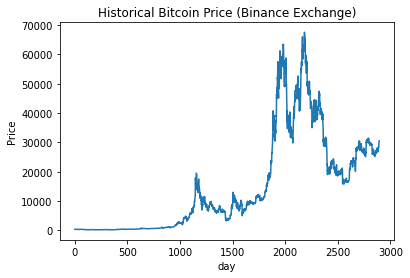

X:(2884, 10, 42),y:(2884, 1)
X_train:(2307, 10, 42),y_train:(2307, 1),X_test:(577, 10, 42),y_test(577, 1)
Epoch 1/40
116/116 [==============================] - 10s 37ms/step - loss: 0.0532
Epoch 2/40
116/116 [==============================] - 4s 37ms/step - loss: 0.0284
Epoch 3/40
116/116 [==============================] - 4s 36ms/step - loss: 0.0138
Epoch 4/40
116/116 [==============================] - 4s 36ms/step - loss: 0.0087
Epoch 5/40
116/116 [==============================] - 4s 37ms/step - loss: 0.0073
Epoch 6/40
116/116 [==============================] - 5s 41ms/step - loss: 0.0068
Epoch 7/40
116/116 [==============================] - 5s 46ms/step - loss: 0.0063
Epoch 8/40
116/116 [==============================] - 5s 41ms/step - loss: 0.0059
Epoch 9/40
116/116 [==============================] - 5s 42ms/step - loss: 0.0057
Epoch 10/40
116/116 [==============================] - 4s 37ms/step - loss: 0.0054
Epoch 11/40
116/116 [==============================] - 4s 36ms/step - lo

In [18]:
# RNN #

list_of_smas = []
for i in df_to_models.columns:
    if 'sma' in i and 'diff1' not in i:
        list_of_smas.append(i)
for i in df_target.columns:
    if 'date' not in i:
        list_of_smas.append(i)
list_of_variables = list_of_smas
X, y, trainScoreLSTM, testScoreLSTM, masemaseTrainScoreLSTM, maseTestScoreLSTM  = test_lstm(df_to_models, list_of_variables)


In [19]:
###   FEATURES TREATED    ###

# 1 target/ close, 2 quitar high low y open 3 las diff1, adj las dejamos las sma fuera. ribbon / indicador ###

df_ft = df_to_models.copy()
df_ft['target_old'] = df_ft['target']

#1 target/ close
df_ft['target'] = (df_ft['target'] - df_ft['close'])/df_ft['close']*100
df_target_old = df_ft[['close','target_old','target']].reset_index()

#2 quitar high,
df_ft = df_ft.drop(columns=['target_old'])

list_of_diff=[] #si encuentra diff
list_of_ribbon=[] 
list_of_adj=[]
list_of_sma_30=[]
list_of_sma_60=[]
# Preparation of features
for i in df_rf.columns:
    if 'diff1' in i:
        list_of_diff.append(i)
    elif 'ribbon' in i:
        list_of_ribbon.append(i)
    elif 'adj' in i:
        list_of_adj.append(i)
    elif 'sma_30' in i:
        list_of_sma_30.append(i)
    elif 'sma_60' in i:
        list_of_sma_60.append(i)
df_out = df_ft.copy()
#df_out['prueba_CPTRA'] = df_prueba['ribbon_CPTRA_30_60']/df_prueba['CPTRA_sma_30']*100
for i in range(len(list_of_sma_60)):
    new_feature = 'percentaje_ribbon_vs_' + list_of_sma_60[i]
    df_out[new_feature] = df_out[list_of_ribbon[i]]/df_out[list_of_sma_60[i]]*100
    
columns_to_drop = list_of_ribbon + list_of_sma_30 + list_of_sma_60 + ['close']
df_out=df_out.drop(columns=columns_to_drop)

In [50]:
###   RANDOM FOREST FEATURES TREATED ###
df_rf = df_out.copy()
maseTestScore_RF_FT, maseTrainScore_RF_FT, mse_RF_FT, mse_train_RF_FT, feature_importances_FT = rf_model(df_rf, max_depth=6)

Variable: cptra_adj            Importance: 0.1842
Variable: percentaje_ribbon_vs_CPTRA_sma_60 Importance: 0.1021
Variable: percentaje_ribbon_vs_ETRVU_sma_60 Importance: 0.0956
Variable: percentaje_ribbon_vs_BLCHS_sma_60 Importance: 0.0938
Variable: df_MWNUS_diff1_sma_10 Importance: 0.0857
Variable: DIFF_sma_60_diff1    Importance: 0.0762
Variable: MKPRU_sma_60_diff1   Importance: 0.0472
Variable: TRFEE_sma_60_diff1   Importance: 0.045
Variable: percentaje_ribbon_vs_DIFF_sma_60 Importance: 0.0437
Variable: percentaje_ribbon_vs_ETRAV_sma_60 Importance: 0.0395
Variable: ribbon_df_MWNUS_diff1_10_20 Importance: 0.0346
Variable: percentaje_ribbon_vs_HRATE_sma_60 Importance: 0.0329
Variable: BLCHS_sma_30_diff1   Importance: 0.0327
Variable: percentaje_ribbon_vs_NTRBL_sma_60 Importance: 0.0315
Variable: df_MWNUS_diff1_sma_20 Importance: 0.0256
Variable: BLCHS_sma_60_diff1   Importance: 0.0119
Variable: MKPRU_sma_30_diff1   Importance: 0.0069
Variable: df_NTRAT_diff1       Importance: 0.0068
Va

ValueError: not enough values to unpack (expected 7, got 5)

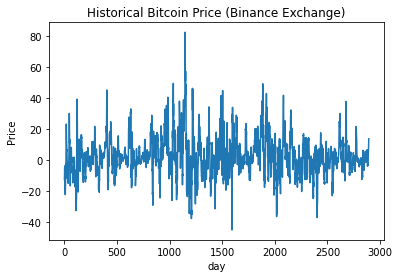

X:(2884, 10, 70),y:(2884, 1)
X_train:(2307, 10, 70),y_train:(2307, 1),X_test:(577, 10, 70),y_test(577, 1)
Epoch 1/40
116/116 [==============================] - 11s 46ms/step - loss: 0.0165
Epoch 2/40
116/116 [==============================] - 5s 42ms/step - loss: 0.0102
Epoch 3/40
116/116 [==============================] - 5s 39ms/step - loss: 0.0103
Epoch 4/40
116/116 [==============================] - 4s 38ms/step - loss: 0.0102
Epoch 5/40
116/116 [==============================] - 5s 40ms/step - loss: 0.0102
Epoch 6/40
116/116 [==============================] - 4s 38ms/step - loss: 0.0102: 
Epoch 7/40
116/116 [==============================] - 4s 38ms/step - loss: 0.0102
Epoch 8/40
116/116 [==============================] - 4s 38ms/step - loss: 0.0101
Epoch 9/40
116/116 [==============================] - 5s 41ms/step - loss: 0.0101
Epoch 10/40
116/116 [==============================] - 4s 38ms/step - loss: 0.0101
Epoch 11/40
116/116 [==============================] - 4s 39ms/step - 

In [21]:
df_lstm = df_out.copy()
X, y,trainSctrainScoreLSTM_FT,  testScoreLSTM_FT, masemaseTrainScoreLSTM_FT, maseTestScoreLSTM_FT = test_lstm(df_lstm, df_lstm.columns)

In [51]:
test_mse_rf = math.sqrt(mseRF)
train_mse_rf = math.sqrt(mse_trainRF)
Test_ScoreLSTMSE = testScoreLSTM
Train_ScoreLSTMSE = trainScoreLSTM
train_mse_rf_ft = math.sqrt(mse_train_RF_FT)
test_mse_rf_ft = math.sqrt(mse_RF_FT)
TrainLSTMSE_ft= trainSctrainScoreLSTM_FT
TestLSTMSE_ft= testScoreLSTM_FT

maseTestScore_RF_FT = maseTestScore_RF_FT
maseTrainScore_RF_FT =  maseTrainScore_RF_FT
maseTestScoreRF = maseTestScoreRF
maseTrainScoremseRF = maseTrainScoremseRF

masemaseTrainScoreLSTM = masemaseTrainScoreLSTM
maseTestScoreLSTM = maseTestScoreLSTM
masemaseTrainScoreLSTM_FT = masemaseTrainScoreLSTM_FT
maseTestScoreLSTM_FT = maseTestScoreLSTM_FT



F = ["Random Forest","LSTM", "Random Forest with perfcentages","LSTM with percentages"]
S = [test_mse_rf,Test_ScoreLSTMSE, test_mse_rf_ft, TestLSTMSE_ft]
T = [train_mse_rf, Train_ScoreLSTMSE, train_mse_rf_ft, TrainLSTMSE_ft]
U = [maseTestScoreRF, maseTestScoreLSTM, maseTestScore_RF_FT, maseTestScoreLSTM_FT]
V = [maseTrainScoremseRF, masemaseTrainScoreLSTM, maseTrainScore_RF_FT, masemaseTrainScoreLSTM_FT]

df_plot = pd.DataFrame(np.c_[F,S,T, U, V],columns = ["MODEL","RMSE TEST","RMSE TRAIN", "MASE TEST", "MASE TRAIN"])
df_plot.to_csv('tests_models.csv', index=False)

In [46]:
df_plot

,MODEL,RMSE TEST,RMSE TRAIN,MASE TEST,MASE TRAIN
0,Random Forest,12229.078936294462,1478.0926328512544,1.598513225455417,0.466931819748009
1,LSTM,5310.464763088067,3554.9952179995967,3.3156731128692627,9.34145736694336
2,Random Forest with perfcentages,16.299552420704483,9.705494771515891,0.8189241157199055,0.716838637920915
3,LSTM with percentages,10.26450233765603,12.4079016827956,0.7430037260055542,0.6270195245742798


In [47]:
"""
test_mse_rf = 13964.715640243294
train_mse_rf = 1167.838027105007

Test_ScoreLSTMSE = 7654.56
Train_ScoreLSTMSE = 3349.19

train_mse_rf_ft = 17.10115027332187
test_mse_rf_ft = 9.77236714767937

TrainLSTMSE_ft= 12.73
TestLSTMSE_ft= 11.22

s = pd.Series([1,2,3,4,5,6])
t = pd.Series([2,4,6,8,10,12])
F = ["Random Forest","LSTM", "Random Forest with perfcentages","LSTM with percentages"]
S = [test_mse_rf,Test_ScoreLSTMSE, test_mse_rf_ft, TestLSTMSE_ft]
T = [train_mse_rf, Train_ScoreLSTMSE, train_mse_rf_ft, TrainLSTMSE_ft]
df_plot = pd.DataFrame(np.c_[F,S,T],columns = ["MODEL","RMSE TEST","RMSE TRAIN"])
#df_plot.to_csv('tests_models.csv')
"""

In [48]:
df_plot

,MODEL,RMSE TEST,RMSE TRAIN
0,Random Forest,13964.715640243294,1167.838027105007
1,LSTM,7654.56,3349.19
2,Random Forest with perfcentages,9.77236714767937,17.10115027332187
3,LSTM with percentages,11.22,12.73
